# --- Day 6: Chronal Coordinates ---
The device on your wrist beeps several times, and once again you feel like you're falling.

"Situation critical," the device announces. "Destination indeterminate. Chronal interference detected. Please specify new target coordinates."

The device then produces a list of coordinates (your puzzle input). Are they places it thinks are safe or dangerous? It recommends you check manual page 729. The Elves did not give you a manual.

If they're dangerous, maybe you can minimize the danger by finding the coordinate that gives the largest distance from the other points.

Using only the Manhattan distance, determine the area around each coordinate by counting the number of integer X,Y locations that are closest to that coordinate (and aren't tied in distance to any other coordinate).

Your goal is to find the size of the largest area that isn't infinite. For example, consider the following list of coordinates:

1, 1
1, 6
8, 3
3, 4
5, 5
8, 9
If we name these coordinates A through F, we can draw them on a grid, putting 0,0 at the top left:

..........
.A........
..........
........C.
...D......
.....E....
.B........
..........
..........
........F.
This view is partial - the actual grid extends infinitely in all directions. Using the Manhattan distance, each location's closest coordinate can be determined, shown here in lowercase:

aaaaa.cccc
aAaaa.cccc
aaaddecccc
aadddeccCc
..dDdeeccc
bb.deEeecc
bBb.eeee..
bbb.eeefff
bbb.eeffff
bbb.ffffFf
Locations shown as . are equally far from two or more coordinates, and so they don't count as being closest to any.

In this example, the areas of coordinates A, B, C, and F are infinite - while not shown here, their areas extend forever outside the visible grid. However, the areas of coordinates D and E are finite: D is closest to 9 locations, and E is closest to 17 (both including the coordinate's location itself). Therefore, in this example, the size of the largest area is 17.

What is the size of the largest area that isn't infinite?

In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

In [2]:
%matplotlib inline

In [3]:
with open('Day6_input.txt') as f:
    points = []
    for line in f:
        a,b = re.findall(r'[0-9]+', line)
        points.append((int(a),int(b)))

In [4]:
arr = np.array(points)
matrix = np.zeros((max(arr[:,0])+50, max(arr[:,1])+50), dtype=int)

In [5]:
# testing with example from exercise
'''
points = [(1, 1),
(1, 6),
(8, 3),
(3, 4),
(5, 5),
(8, 9)]
arr = np.array(points)
matrix = np.zeros((10,10), dtype=int)
'''
print('not testing')

not testing


In [7]:
def distance(p1, p2):
    return np.abs(p1[0] - p2[0]) + np.abs(p1[1] - p2[1])

def nearest(points, p):
    occ = defaultdict(list)
    for c, point in enumerate(points):
        dist = distance(p, point)
        occ[dist].append(c+1)
    if len(occ[min(occ)]) > 1:
        near = 0
    else:
        near = occ[min(occ)][0]
    return int(near)        

In [8]:
a, b = matrix.shape
for i in range(a):
    for j in range(b):
        matrix[i,j] = nearest(points, (i,j))

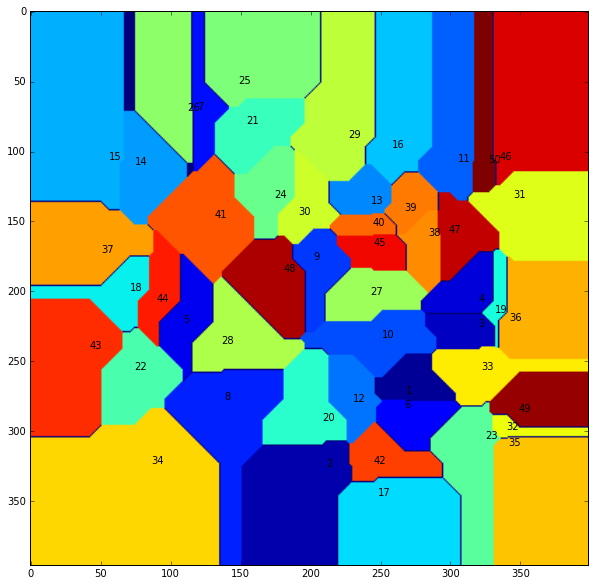

In [9]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.transpose(matrix))
#plt.scatter(arr[:,1], arr[:,0], c='r')
for t, point in enumerate(points):
    plt.text(x=point[0], y=point[1], s=str(t+1))

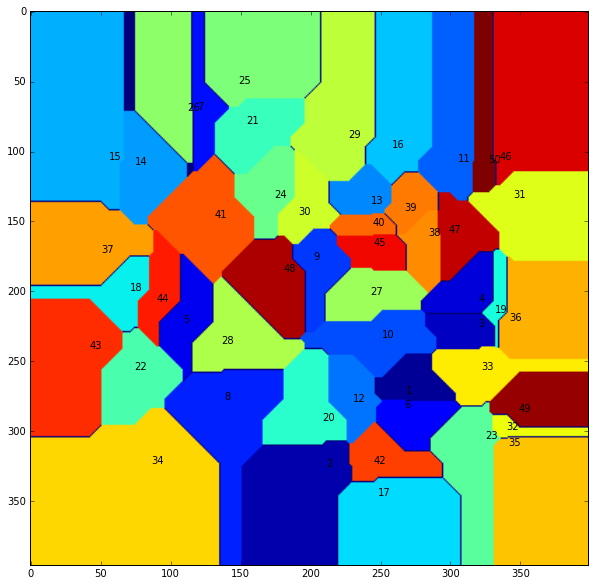

In [93]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.transpose(matrix))
#plt.scatter(arr[:,1], arr[:,0], c='r')
for t, point in enumerate(points):
    plt.text(x=point[0], y=point[1], s=str(t+1))

In [36]:
edges = np.unique(np.concatenate((matrix[:,[0,-1]].flatten(),matrix[[0,-1],:].flatten())))

In [37]:
bincount = np.bincount(matrix.flatten())

In [38]:
top = 0
for i, b in enumerate(bincount):
    if (not i in edges) & (b > top ):
        top = b
        index = i

In [40]:
print('area {} consists of {} patches'.format(index, top))

area 41 consists of 3840 patches


## --- Part Two ---

On the other hand, if the coordinates are safe, maybe the best you can do is try to find a region near as many coordinates as possible.

For example, suppose you want the sum of the Manhattan distance to all of the coordinates to be less than 32. For each location, add up the distances to all of the given coordinates; if the total of those distances is less than 32, that location is within the desired region. Using the same coordinates as above, the resulting region looks like this:

..........
.A........
..........
...###..C.
..#D###...
..###E#...
.B.###....
..........
..........
........F.

In particular, consider the highlighted location 4,3 located at the top middle of the region. Its calculation is as follows, where abs() is the absolute value function:

    Distance to coordinate A: abs(4-1) + abs(3-1) =  5
    Distance to coordinate B: abs(4-1) + abs(3-6) =  6
    Distance to coordinate C: abs(4-8) + abs(3-3) =  4
    Distance to coordinate D: abs(4-3) + abs(3-4) =  2
    Distance to coordinate E: abs(4-5) + abs(3-5) =  3
    Distance to coordinate F: abs(4-8) + abs(3-9) = 10
    Total distance: 5 + 6 + 4 + 2 + 3 + 10 = 30

Because the total distance to all coordinates (30) is less than 32, the location is within the region.

This region, which also includes coordinates D and E, has a total size of 16.

Your actual region will need to be much larger than this example, though, instead including all locations with a total distance of less than 10000.

What is the size of the region containing all locations which have a total distance to all given coordinates of less than 10000?


In [101]:
def proximity(points, p):
    sum = 0
    for point in points:
        sum += distance(point, p)
    if sum < 10000:
        return 1
    return 0

In [102]:
a, b = matrix.shape
for i in range(a):
    for j in range(b):
        matrix[i,j] = proximity(points, (i,j))

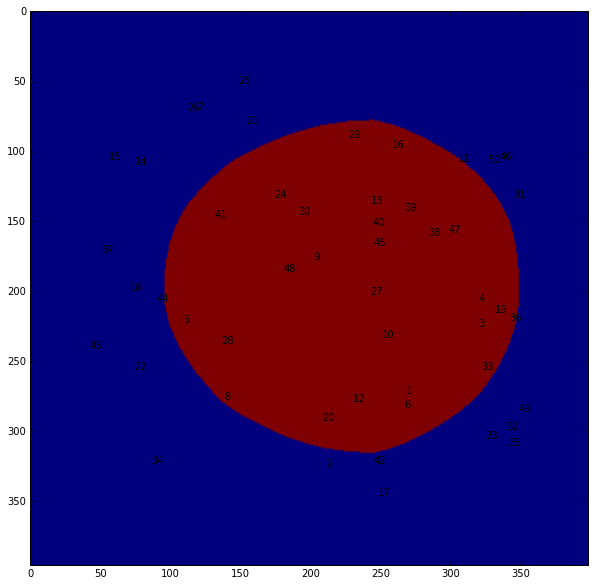

In [103]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.transpose(matrix))
#plt.scatter(arr[:,1], arr[:,0], c='r')
for t, point in enumerate(points):
    plt.text(x=point[0], y=point[1], s=str(t+1))

In [105]:
np.bincount(matrix.flatten())[1]

46542